In [1]:
# Slides for Probability and Statistics module, 2016-2017
# Matt Watkins, University of Lincoln

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Hypothesis Testing

This is another part of statistical inference.

Last week we estimated or inferred the values of population parameters (mean and variance) from statistical data.

We looked at confidence intervals - we estimated or inferred the range of values of population parameters with a certain degree of probability or confidence

This week we look at some methods to make decisions based on these estimates.

**Example**

Suppose we'd been following some population over a period of time and found it to be normally distributed with mean $\mu$ and standard deviation $\sigma$. Now, for some reason we have a suspicion that the the mean has changed in some way. 

We want to formulate some test that would allow us to make an informed decision whether our suspicions were correct or not. How should we attack this?

At root, we will draw a random sample $X_1, X_2, \ldots, X_n$ and calculate the value of the sample mean, $\bar{x}$, for the values we've drawn,$x_1, x_2, \ldots, x_n$.

We then look at the difference between the sample mean $\bar{x}$ and $\mu$.

- if the difference is large, we could decide that the mean of the population is no longer $\mu$
- if the difference is small, we accept that there is no evidence to support our suspicion and that the mean is still $\mu$.

The problem here is what is large and what is small?

We'd expect large and small to related to 

- the spread of the distribution
- and the sample size)

We can use essentially the same methods we used to construct confidence intervals to try and quantify whether the difference between the sample mean and the presumed population mean is **significant**.

## Schematic of a construction of a test for the mean

Let us assume that the population mean is $\mu$,then we consider the distribution of the sample statistic $\bar{X}$ under this assumption. 

Remember we know that historically the population was 

- normally distributed 
- with mean $\mu$ and 
- standard deviation $\sigma$, 

so we are assuming that the random sample is drawn from this distribution. 

We have shown that $\bar{X}$ should be an unbiased estimator for $\text{E}[\bar{X}] = \text{E}[X] = \mu$.

As the random sample should be drawn from $N(\mu, \sigma)$ the sample mean $\bar{X}$ should be distributed $N(\mu, \sigma/N)$.

Then we \textbf{standardize} our variable 

$$
\frac{\bar{X}-\mu}{\sigma/\sqrt{N}} \sim N(0,1)
$$
where $\sim$ means is distributed as.

When we have taken our particular sample of $X_1, X_2, \ldots, X_n$ we have $x_1, x_2, \ldots, x_n$ and can calculate $\bar{x}$. The particular standardized value
$$
\frac{\bar{x}-\mu}{\sigma/\sqrt{N}}
$$
should have come from the standard normal distribution.


We could say that we'll not reject our value if it is a value that could be drawn from a standard normal distribution with some probability. So for instance 95% of the time a random value drawn from a standard normal distribution will have a value between -1.96 and 1.96. 

In [4]:
zclower = stats.norm.ppf(0.025)
zcupper = stats.norm.ppf(0.975)
print(zclower, zcupper)

-1.95996398454 1.95996398454


In other words we'd reject our idea if the value we got was only 5% likely to have come from our assumed distribution. To get this value we look for the 2.5% quantile at the bottom, and 97.5% quantile at the top of the distribution.

Lets look at a plot of the regions that don't satisfy this:

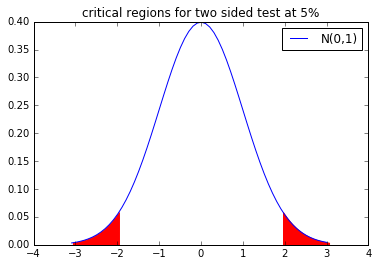

In [10]:
fig, ax = plt.subplots(1, 1)

x = np.arange(- stats.norm.ppf(0.999),stats.norm.ppf(0.999),0.1)

two_sided = True
critical_value = 0.95
if two_sided:
    critical_value = 0.95 + (1-0.95)/2
zc =  stats.norm.ppf(critical_value)

ax.plot(x, stats.norm.pdf(x), '-', ms=4, label='N(0,1)');

section = np.arange(zc, stats.norm.ppf(0.999), 0.1)
plt.fill_between(section,stats.norm.pdf(section), color='r');
plt.fill_between(-section,stats.norm.pdf(section), color='r');

ax.set_title("critical regions for two sided test at 5%");

ax.legend();

## Summary of procedure to test if the population mean is $\mu$

- assume that the population mean is $\mu$
- choose a significance level, $\alpha \cdot 100$%, and calculate the corresponding critical values and rejection areas
- take a random sample of size $N$ from the population under consideration
- calculate the quantity 
$$
\frac{\bar{x}-\mu}{\sigma/\sqrt{N}}
$$
using the sample results
- if the calculated quantity is in the rejection areas we reject the idea that the population mean is $\mu$. We say that there is evidence at the $\alpha \cdot 100$% level that the population mean is not $\mu$. 
- otherwise we have no evidence that our suggestion that $\mu$ is not a reasonable proposition


**example**

A machine produces components whose lengths should be distributed Normally with mean 0.160 cm and standard deviation 0.012 cm. 

A sample of 100 is drawn and the sample mean computed as 0.157 cm. 

- Is there any evidence at the 5% level that the mean of component lengths has changed?

We are given that $\mu=0.160$, $\sigma=0.012$, $\bar{x}=0.157$ and $N=100$.

- We assume that the component lengths are distributed as $N(0.16,(0.012)^2)$.


- A 5% significance level gives us critical $z$ values of $\pm 1.96$, so the rejection areas are as we just saw.

- We calculate our standardized test statistic, here its value is

$$
\frac{\bar{x}-\mu}{\sigma/\sqrt{N}} = \frac{0.157-0.160}{0.012/\sqrt{100}} = -2.5
$$


- The above value lies in our rejection region, and so is significant at the 5% level.


- Therefore, the original assumption can be rejected and we have shown that there is evidence at the 5% level that the mean of the component lengths has changed.


- Note that $\bar{x}$ is pretty close to $\mu$ - but the standard deviation is small, and the sample size is large - both give allow us to resolve smaller differences between the sample and assumed population mean. 

## P-values

there is another slightly different procedure that can be followed:  we run the data and give the critical significance level at which we would reject our hypothesis.

**example**

if we look at our last example again

$$
\frac{\bar{x}-\mu}{\sigma/\sqrt{N}} = \frac{0.157-0.160}{0.012/\sqrt{100}} = -2.5
$$

our test statistic came out at -2.5. The probability of getting this value from a standard normal distribution is $\Phi(-2.5)$


In [6]:
stats.norm.cdf(-2.5)

0.0062096653257761323

so there is only a 0.6% chance of getting a value of -2.5 (or less) from a standard normal distribution.

We'd have rejected this if the significance level was set at twice this value (because we are doing a two sided test we have the same amount of probability density at the top as the bottom). 

So the $P$ value is 

In [7]:
2*stats.norm.cdf(-2.5)

0.012419330651552265

We'd reject this value at a 1.2% significance level (but we'd accept at a 1% level).

### One sided vs two sided

We've tended to use a symmetric criteria, or a so called two-sided test (our confidence regions were the same), i.e the value of $\mid \bar{x} - \mu \mid$ is what we've been examining above.

We might have a suspicion that the mean had decreased (the average weight of cakes in our favourite bakery/cafe has decreased for instance)...

In this case we would only be interested in whether the standardized value was too small to be likely have come from our hypthesized distribution. 

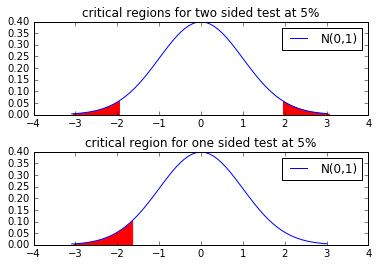

In [11]:
fig, ax = plt.subplots(2, 1)

x = np.arange(- stats.norm.ppf(0.999),stats.norm.ppf(0.999),0.1)

# two sided test

two_sided = True
critical_value = 0.95
if two_sided:
    critical_value = 0.95 + (1-0.95)/2
zc =  stats.norm.ppf(critical_value)

ax[0].plot(x, stats.norm.pdf(x), '-', ms=4, label='N(0,1)');
section = np.arange(zc, stats.norm.ppf(0.999), 0.1)
ax[0].fill_between(section,stats.norm.pdf(section), color='r');
ax[0].fill_between(-section,stats.norm.pdf(section), color='r');

ax[0].set_title("critical regions for two sided test at 5%");

ax[0].legend();

# one sided test

two_sided = False
critical_value = 0.95
if two_sided:
    critical_value = 0.95 + (1-0.95)/2
zc =  stats.norm.ppf(critical_value)

ax[1].plot(x, stats.norm.pdf(x), '-', ms=4, label='N(0,1)');
section = np.arange(zc, stats.norm.ppf(0.999), 0.1)
ax[1].fill_between(-section,stats.norm.pdf(section), color='r');

ax[1].set_title("critical region for one sided test at 5%");

ax[1].legend();

fig.subplots_adjust(hspace=0.4)

In both cases there is a total of 5% of the probability density in the critical region, but in the one sided case, we are only interested in the lower range (if cakes have really got bigger, that is fine).

We could be interested in an upper bound instead, which would be the same as the lower, but at the top...

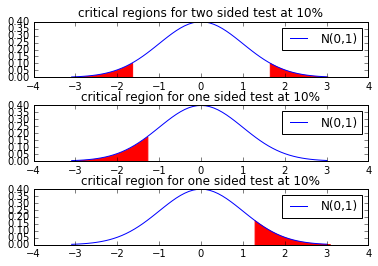

In [9]:
fig, ax = plt.subplots(3, 1)

x = np.arange(- stats.norm.ppf(0.999),stats.norm.ppf(0.999),0.1)

# two sided test

two_sided = True
critical_value = 0.90
if two_sided:
    critical_value = critical_value + (1-critical_value)/2
zc =  stats.norm.ppf(critical_value)

ax[0].plot(x, stats.norm.pdf(x), '-', ms=4, label='N(0,1)');
section = np.arange(zc, stats.norm.ppf(0.999), 0.1)
ax[0].fill_between(section,stats.norm.pdf(section), color='r');
ax[0].fill_between(-section,stats.norm.pdf(section), color='r');

ax[0].set_title("critical regions for two sided test at 10%");

ax[0].legend();

# one sided test lower

two_sided = False
critical_value = 0.90
if two_sided:
    critical_value = critical_value + (1-critical_value)/2
zc =  stats.norm.ppf(critical_value)

ax[1].plot(x, stats.norm.pdf(x), '-', ms=4, label='N(0,1)');
section = np.arange(zc, stats.norm.ppf(0.999), 0.1)
ax[1].fill_between(-section,stats.norm.pdf(section), color='r');

ax[1].set_title("critical region for one sided test at 10%");

ax[1].legend();

# one sided test upper

two_sided = False
critical_value = 0.90
if two_sided:
    critical_value = critical_value + (1-critical_value)/2
zc =  stats.norm.ppf(critical_value)

ax[2].plot(x, stats.norm.pdf(x), '-', ms=4, label='N(0,1)');
section = np.arange(zc, stats.norm.ppf(0.999), 0.1)
ax[2].fill_between(section,stats.norm.pdf(section), color='r');

ax[2].set_title("critical region for one sided test at 10%");

ax[2].legend();

fig.subplots_adjust(hspace=0.5)

**example**

A machine produces components whose lengths should be distributed Normally with mean 0.160 cm and standard deviation 0.012 cm. 

A sample of 100 is drawn and the sample mean computed as 0.157 cm. 

- Is there any evidence at the 1% level that the mean component length has reduced?
- What is the P-value of the test?

We are given that $\mu=0.160$, $\sigma=0.012$, $\bar{x}=0.157$ and $N=100$.

- We assume that the component lengths are distributed as $N(0.16,(0.012)^2)$.
- A 1% significance level gives us critical $z$ value of $-2.33$, for a one-sided test


In [12]:
stats.norm.ppf(0.01)

-2.3263478740408408


- We calculate our standardized test statistic, here its value is
$$
\frac{\bar{x}-\mu}{\sigma/\sqrt{N}} = \frac{0.157-0.160}{0.012/\sqrt{100}} = -2.5
$$
- The above value lies in our rejection region, and so is significant at the 1% level.
- Therefore, the original assumption can be rejected and we have shown that there is evidence at the 1% level that the mean of the component lengths has reduced.
- The P-value is just the significance level at which we'd have rejected the hypothesis. For a one-sided test it is just the value of the cumulative distribution at the test statistic - 0.6% 

In [14]:
stats.norm.cdf(-2.5)

0.0062096653257761323

## Note on interpretation

as is often the case in science, it is relatively easy to prove something is false - in this case if the data fall in the rejection region we can say with a known confidence that it is unlikely to come from our assumed distribution.

However, the case where the data is not in the critical region is harder to be certain about: We can not argue that it shows that the data does come from our assumed distribution; Just that it is plausible, or there is no evidence that it doesn't. 

We don't really accept our hypothesis, we just don't reject it.

## Hypotheses

normally the above is put a bit more formally.

- we have a null hypothesis - this is the default assumption, and the one we would continue to accept if the evidence doesn't make us change our opinion.
- we have an alternative hypothesis, which would be our new default point of view if the evidence calls on us to reject the null hypothesis.

These are typically written

- $H_0$: mean = $\mu$ 
> the null hypothesis is that the mean has value $\mu$

- $H_1$: mean $\ne$ $\mu$
> the alternative hypothesis is that the mean is not equal to $\mu$, and we'd use a two sided test

or 

- $H_1$: mean $\lt$ $\mu$
> the alternative hypothesis is that the mean is less than $\mu$, and we'd use a one sided test

- $H_1$: mean $\gt$ $\mu$
> the alternative hypothesis is that the mean is more than $\mu$, and we'd use a one sided test



# Summary

Testing the mean when the variance is known

- define $H_0$ and $H_1$
- assume that the population mean is $\mu$
- choose a significance level, $\alpha \cdot 100$%, and calculate the corresponding critical values and rejection areas corresponding to the significance level and the hypotheses.
- take a random sample of size $N$ from the population under consideration
- calculate the quantity 
$$
\frac{\bar{x}-\mu}{\sigma/\sqrt{N}}
$$
using the sample results
- if the calculated quantity is in the rejection areas we reject the idea that the population mean is $\mu$. We say that there is evidence at the $\alpha \cdot 100$% level that the population mean is not $\mu$. 
- otherwise we have no evidence that our suggestion that $\mu$ is not a reasonable proposition

All this applies to other population parameters or sample statistics - we just need to use appropriate distributions.